In [9]:
import yt
from yt.testing import fake_particle_ds

def create_tst_data_on_disk(nparticles):
    nparticles = int(nparticles)
    ds = fake_particle_ds(npart=nparticles)
    ad = ds.all_data()
    fn = f"test_data_{nparticles}"
    ad.save_as_dataset(fn, fields = ds.field_list)
    return fn + ".h5"

fn = create_tst_data_on_disk(1e7)
ds = yt.load(fn)
ds.field_list
ds.index

yt : [INFO     ] 2023-07-17 16:50:58,615 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-07-17 16:50:58,616 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-07-17 16:50:58,616 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-07-17 16:50:58,617 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-07-17 16:50:58,617 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-07-17 16:50:58,619 Allocating for 1e+07 particles
yt : [INFO     ] 2023-07-17 16:51:02,842 Saving field data to yt dataset: test_data_10000000.h5.
yt : [INFO     ] 2023-07-17 16:51:05,421 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2023-07-17 16:51:05,422 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-07-17 16:51:05,422 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-07-17 16:51:05,423 Parameters: domain_right_edge         = [1. 1. 1.] code_lengt

In [4]:
%%timeit
ad = ds.all_data()
_ = ad['all', 'particle_velocity_x']

5.46 s ± 89.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%%time
ad = ds.all_data()
_ = ad['all', 'particle_velocity_x']

CPU times: user 1min 23s, sys: 2.75 s, total: 1min 25s
Wall time: 1min 25s


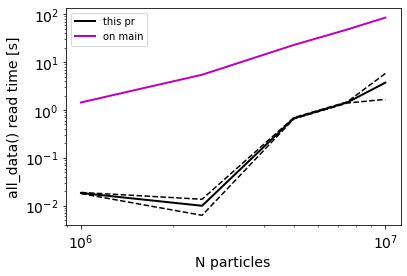

In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import numpy as np

# on ytdata_check_for_all_data:

sizes = [1e6, 2.5e6, 5e6, 7.5e6, 1e7]
elapsed_time_s = [18.5*1e-3, 1e1*1e-3, 671*1e-3, 1.44, 3.73]
std_s = [253*1e-6, 1.84*1e-3, 9.98*1e-3, 20.5*1e-3, 1.03]
df_check_for_all = pd.DataFrame({'sizes': sizes, 'elapsed_time_s': elapsed_time_s, 'std_s': std_s})

# on main:
sizes = [1e6, 2.5e6, 5e6, 7.5e6, 1e7]
elapsed_time_s = [1.44, 5.46, 22.8, 48.1, 85]
std_s = [20.5*1e-3, 89.1*1e-3, np.nan, np.nan, np.nan]
df_main = pd.DataFrame({'sizes': sizes, 'elapsed_time_s': elapsed_time_s, 'std_s': std_s})

plt.loglog(df_check_for_all.sizes, df_check_for_all.elapsed_time_s,'k', linewidth=2, label='this pr')
plt.loglog(df_check_for_all.sizes, df_check_for_all.elapsed_time_s+2*df_check_for_all.std_s, '--k', label='_nolegend_')
plt.loglog(df_check_for_all.sizes, df_check_for_all.elapsed_time_s-2*df_check_for_all.std_s, '--k', label='_nolegend_')
plt.loglog(df_main.sizes, df_main.elapsed_time_s,'m', linewidth=2, label='on main')


plt.xlabel('N particles', fontdict={'size':14})
plt.ylabel('all_data() read time [s]', fontdict={'size':14})
plt.gca().tick_params(axis='both',labelsize=14)        
plt.legend()

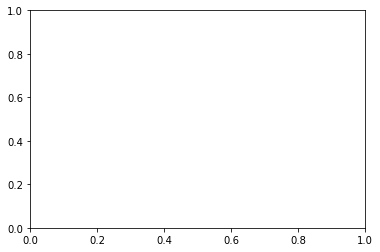

In [29]:
ax = plt.gca()
ax